# Analysis of F.R.I.E.N.D.S Dataset

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Load in the dataset using pandas and save the dataframe into a variable (df)

In [2]:
df = pd.read_csv(r"FRIENDS\v3.csv",encoding='Windows-1252')

In [3]:
df.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year_of_prod    236 non-null    int64  
 1   Season          236 non-null    int64  
 2   Episode Number  236 non-null    int64  
 3   Episode_Title   236 non-null    object 
 4   Duration        236 non-null    int64  
 5   Summary         236 non-null    object 
 6   Director        236 non-null    object 
 7   Stars           236 non-null    float64
 8   Votes           236 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 16.7+ KB


We have 9 columns and 236 observations, no NAN or Missing values from our dataset and 3 general datatypes that our data varies on. 

### Categorizing df by each season and episode
To view our data better lets group our data by season and order them as released

In [6]:
seasons = df.groupby(['Season', 'Episode Number'])
seasons.first()

Year_of_prod  \
Season Episode Number                 
1      1                       1994   
       2                       1994   
       3                       1994   
       4                       1994   
       5                       1994   
...                             ...   
10     14                      2004   
       15                      2004   
       16                      2004   
       17                      2004   
       18                      2004   

                                                         Episode_Title  \
Season Episode Number                                                    
1      1               The One Where Monica Gets a Roommate: The Pilot   
       2                          The One with the Sonogram at the End   
       3                                        The One with the Thumb   
       4                            The One with George Stephanopoulos   
       5                The One with the East German Laundry Detergent   
...                                                                ...   
10     14                               The One with Princess Consuela   
       15                                   The One Where Estelle Dies   
       16                       The One with Rachel's Going Away Party   
       17                                         The Last One: Part 1   
       18                                         The Last One: Part 2   

                       Duration  \
Season Episode Number             
1      1                     22   
       2                     22   
       3                     22   
       4                     22   
       5                     22   
...                         ...   
10     14                    22   
       15                    22   
       16                    22   
       17                    30   
       18                    30   

                                                                 Summary  \
Season Episode Number                                                      
1      1               Monica and the gang introduce Rachel to the "r...   
       2               Ross finds out his ex-wife is pregnant. Rachel...   
       3               Monica becomes irritated when everyone likes h...   
       4               Joey and Chandler take Ross to a hockey game t...   
       5               Eager to spend time with Rachel, Ross pretends...   
...                                                                  ...   
10     14              When Phoebe goes to get her name changed she r...   
       15              Ross tries to get Rachel to go back to Ralph L...   
       16              The gang throws Rachel a goodbye party, during...   
       17              Erica gives birth to the baby that Monica and ...   
       18              Phoebe races Ross to the airport in a bid to s...   

                             Director  Stars  Votes  
Season Episode Number                                
1      1                James Burrows    8.3   7440  
       2                James Burrows    8.1   4888  
       3                James Burrows    8.2   4605  
       4                James Burrows    8.1   4468  
       5                Pamela Fryman    8.5   4438  
...                               ...    ...    ...  
10     14              Gary Halvorson    8.6   2989  
       15              Gary Halvorson    8.5   2771  
       16              Gary Halvorson    8.9   3141  
       17                Kevin Bright    9.5   6221  
       18                Kevin Bright    9.7  10381  

[236 rows x 7 columns]

What are the total number of episodes per season?

In [80]:
df[['Season', 'Episode Number']].groupby('Season').count()

,Episode Number
Season,
1,24
2,24
3,25
4,24
5,24
6,25
7,24
8,24
9,24


Average rating per season?

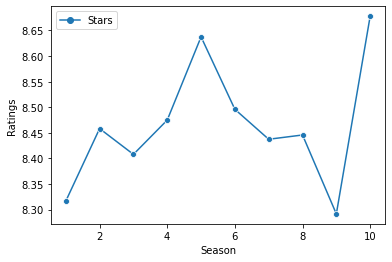

In [92]:
avg_rating_per_season = df[['Season', 'Stars']].groupby('Season').mean()
sns.lineplot(data=avg_rating_per_season, markers='o')
plt.ylabel('Ratings')
plt.show()

What is the title, season, episode number and duration of the longest running episodes?

In [81]:
longest_ep = df[df.Duration == df.Duration.max()]
longest_ep[['Season', 'Episode Number', 'Duration', 'Episode_Title']]

,Season,Episode Number,Duration,Episode_Title
95,4,23,30,The One with Ross's Wedding
96,4,24,30,The One with Ross's Wedding
135,6,15,30,The One That Could Have Been
136,6,16,30,The One That Could Have Been
144,6,24,30,The One with the Proposal
145,6,25,30,The One with the Proposal
234,10,17,30,The Last One: Part 1
235,10,18,30,The Last One: Part 2


What is the number of episodes each director has directed?

In [22]:
df.groupby(['Director'])['Director'].count().sort_values(ascending=False)

Director
Gary Halvorson          54
Kevin Bright            54
Michael Lembeck         24
James Burrows           15
Gail Mancuso            14
Peter Bonerz            12
Ben Weiss               10
David Schwimmer         10
Shelley Jensen           6
Robby Benson             6
Terry Hughes             5
Dana De Vally Piazza     3
Sheldon Epps             3
Thomas Schlamme          2
Steve Zuckerman          2
Roger Christiansen       2
Alan Myerson             2
Pamela Fryman            2
Paul Lazarus             1
Andrew Tsao              1
Sam Simon                1
Mary Kay Place           1
Joe Regalbuto            1
Stephen Prime            1
Ellen Gittelsohn         1
David Steinberg          1
Arlene Sanford           1
Todd Holland             1
Name: Director, dtype: int64

Which are the top 10 most highest rated FRIENDS episodes of all time?

In [20]:
highest_rated = df.sort_values(by=['Stars'], ascending=False)
highest_rated[['Stars', 'Season', 'Episode Number', 'Episode_Title', 'Director']].head(10)

,Stars,Season,Episode Number,Episode_Title,Director
235,9.7,10,18,The Last One: Part 2,Kevin Bright
110,9.7,5,14,The One Where Everybody Finds Out,Michael Lembeck
234,9.5,10,17,The Last One: Part 1,Kevin Bright
84,9.5,4,12,The One with the Embryos,Kevin Bright
37,9.4,2,14,The One with the Prom Video,James Burrows
178,9.3,8,9,The One with the Rumor,Gary Halvorson
145,9.3,6,25,The One with the Proposal,Kevin Bright
173,9.3,8,4,The One with the Videotape,Kevin Bright
96,9.2,4,24,The One with Ross's Wedding,Kevin Bright
169,9.2,7,24,The One with Monica and Chandler's Wedding: Pa...,Kevin Bright


We can clearly see that the last two episodes of the franchise are among the top 3 most highest rated episodes